In [8]:
import pandas as pd
import numpy as np
from numpy import log
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
csv_data = pd.read_csv('C:/Users/暴脾气の尧/Desktop/#TUM 2 SEMESTER/Applied Machine Intelligence/elec_forecast.csv')
#C:/Users/U388316/OneDrive - Danfoss/Desktop/usb_tum/ami/Han-20210616T220428Z-001/Han/elec_forecast.csv
csv_data.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],...,Residual load[MWh],Lufttemp.+200cm,Lufttemp.+20cm,Bodentemp.-5cm,Bodentemp.-20cm,Luftfeuchtigkeit+200cm,Windgeschw.+250cm,Niederschlag,Globalstrahlg.+200cm,Spot price
0,2015/1/1,0,1006.25,289.75,129.25,2032.00,0.0,33.00,2677.75,3922.00,...,1380.75,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,25.02
1,2015/1/1,1,995.75,297.00,129.00,2074.25,0.0,30.75,2771.50,3830.75,...,1229.75,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,18.29
2,2015/1/1,2,1005.00,284.75,128.50,2135.25,0.0,23.50,2756.50,3704.50,...,1126.25,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,16.04
3,2015/1/1,3,1010.50,280.50,129.75,2138.25,0.0,22.00,2757.00,3518.75,...,1141.00,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,14.60
4,2015/1/1,4,1009.75,278.00,130.00,2161.00,0.0,22.00,2740.75,3529.00,...,1170.25,2.9,2.0,3.1,3.4,100.0,1.5,0.0,39.0,14.95


Temporarily drop features that have small coeff (refer to plot from Xuyang)

In [29]:
csv_data =csv_data.drop(['Photovoltaics[MWh]','Nuclear[MWh]','Luftfeuchtigkeit+200cm','Other conventional[MWh]','Niederschlag','Lufttemp.+200cm','Lufttemp.+20cm','Bodentemp.-5cm','Bodentemp.-20cm','Wind offshore[MWh]','Globalstrahlg.+200cm'],axis=1)
csv_data.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind onshore[MWh],Other renewable[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Total[MWh],Residual load[MWh],Windgeschw.+250cm,Spot price
0,2015/1/1,0,1006.25,289.75,2032.00,33.00,3922.00,805.0,306.50,453.00,2303.00,1380.75,1.5,25.02
1,2015/1/1,1,995.75,297.00,2074.25,30.75,3830.75,588.0,217.75,272.50,2245.50,1229.75,1.5,18.29
2,2015/1/1,2,1005.00,284.75,2135.25,23.50,3704.50,557.0,202.25,238.00,2195.75,1126.25,1.5,16.04
3,2015/1/1,3,1010.50,280.50,2138.25,22.00,3518.75,585.0,205.25,141.75,2151.50,1141.00,1.5,14.60
4,2015/1/1,4,1009.75,278.00,2161.00,22.00,3529.00,615.5,207.75,173.25,2134.25,1170.25,1.5,14.95


Precharge Top Absolute Correlations
Fossil brown coal[MWh]  Fossil hard coal[MWh]    0.950882
Fossil hard coal[MWh]   Residual load[MWh]       0.928672
Wind onshore[MWh]       Residual load[MWh]       0.927969
Fossil brown coal[MWh]  Residual load[MWh]       0.879485
Biomass[MWh]            Other renewable[MWh]     0.835921
Residual load[MWh]      Spot price               0.810754
Wind onshore[MWh]       Fossil hard coal[MWh]    0.791899
Fossil hard coal[MWh]   Spot price               0.783963
Residual load[MWh]      Windgeschw.+250cm        0.774903
Wind onshore[MWh]       Windgeschw.+250cm        0.766337
dtype: float64


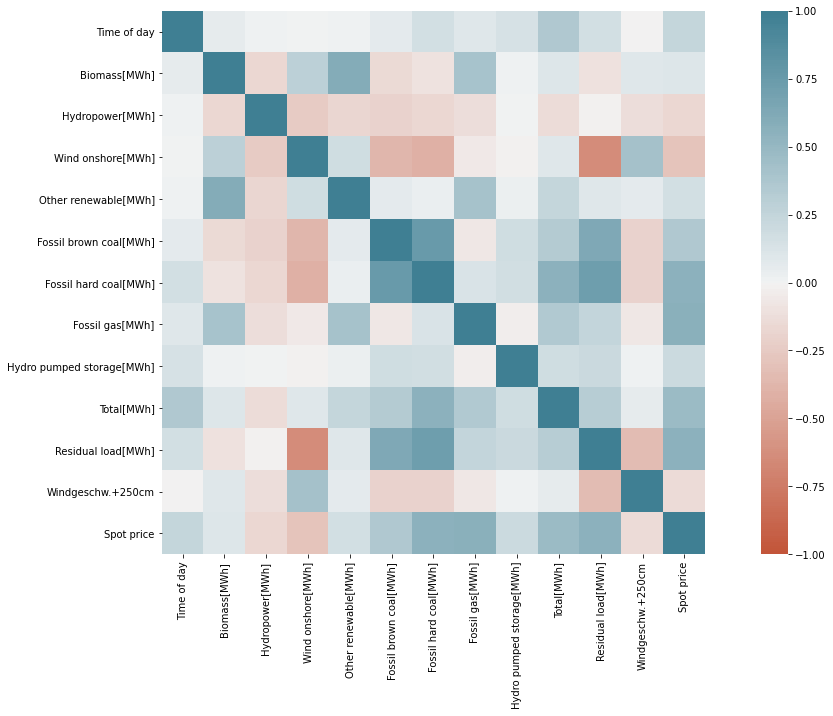

In [30]:
def plot_correlation_matrix(corr_mat):
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(
        corr_mat2, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        )

# Correlation in Percentage
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

corr_mat2 = csv_data.corr(method='spearman')
plot_correlation_matrix(corr_mat2)

print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

'Fossil brown coal[MWh]'， 'Fossil hard coal[MWh]' and 'Residual load[MWh]' are highly correlated, since 'Residual load[MWh]' have many missing values, drop this motherfucker

In [31]:
csv_data =csv_data.drop(['Fossil brown coal[MWh]','Residual load[MWh]'],axis=1)
csv_data.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind onshore[MWh],Other renewable[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Total[MWh],Windgeschw.+250cm,Spot price
0,2015/1/1,0,1006.25,289.75,2032.00,33.00,805.0,306.50,453.00,2303.00,1.5,25.02
1,2015/1/1,1,995.75,297.00,2074.25,30.75,588.0,217.75,272.50,2245.50,1.5,18.29
2,2015/1/1,2,1005.00,284.75,2135.25,23.50,557.0,202.25,238.00,2195.75,1.5,16.04
3,2015/1/1,3,1010.50,280.50,2138.25,22.00,585.0,205.25,141.75,2151.50,1.5,14.60
4,2015/1/1,4,1009.75,278.00,2161.00,22.00,615.5,207.75,173.25,2134.25,1.5,14.95


In [13]:
corr_mat2 = csv_data.corr(method='spearman')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Biomass[MWh]           Other renewable[MWh]     0.841405
Fossil hard coal[MWh]  Spot price               0.807198
                       Total[MWh]               0.764508
Wind onshore[MWh]      Fossil hard coal[MWh]    0.727414
                       Windgeschw.+250cm        0.709475
Total[MWh]             Spot price               0.691700
Fossil gas[MWh]        Spot price               0.680812
Wind onshore[MWh]      Spot price               0.672698
Windgeschw.+250cm      Spot price               0.592272
Fossil hard coal[MWh]  Windgeschw.+250cm        0.567764
dtype: float64


In [32]:
csv_data =csv_data.drop(['Other renewable[MWh]'],axis=1)

In [15]:
corr_mat2 = csv_data.corr(method='spearman')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Fossil hard coal[MWh]  Spot price               0.806286
                       Total[MWh]               0.763971
Wind onshore[MWh]      Fossil hard coal[MWh]    0.725359
                       Windgeschw.+250cm        0.714712
Fossil gas[MWh]        Spot price               0.704003
Total[MWh]             Spot price               0.690598
Wind onshore[MWh]      Spot price               0.670951
Windgeschw.+250cm      Spot price               0.596143
Fossil hard coal[MWh]  Windgeschw.+250cm        0.574091
Hydropower[MWh]        Total[MWh]               0.472147
dtype: float64


# IMPROVEMENT 1 try if remove other correlated features can lead to better accuracy

In [33]:
csv_data =csv_data.drop(['Total[MWh]','Windgeschw.+250cm'],axis=1)

In [18]:
corr_mat2 = csv_data.corr(method='spearman')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Fossil hard coal[MWh]  Spot price                   0.691941
Hydropower[MWh]        Spot price                   0.660954
Fossil gas[MWh]        Spot price                   0.623566
Hydropower[MWh]        Fossil gas[MWh]              0.554701
Biomass[MWh]           Fossil gas[MWh]              0.519413
Hydropower[MWh]        Fossil hard coal[MWh]        0.499696
Biomass[MWh]           Hydropower[MWh]              0.452602
Fossil gas[MWh]        Hydro pumped storage[MWh]    0.398816
Biomass[MWh]           Fossil hard coal[MWh]        0.386877
                       Hydro pumped storage[MWh]    0.299398
dtype: float64


In [34]:
csv_data =csv_data.drop(['Hydropower[MWh]','Biomass[MWh]'],axis=1)

In [35]:
corr_mat2 = csv_data.corr(method='spearman')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Wind onshore[MWh]      Fossil hard coal[MWh]        0.889903
                       Spot price                   0.854977
Fossil hard coal[MWh]  Spot price                   0.735986
Fossil gas[MWh]        Spot price                   0.656205
                       Hydro pumped storage[MWh]    0.409725
Wind onshore[MWh]      Fossil gas[MWh]              0.378779
Time of day            Wind onshore[MWh]            0.220309
Wind onshore[MWh]      Hydro pumped storage[MWh]    0.220248
Time of day            Fossil gas[MWh]              0.152276
Fossil hard coal[MWh]  Fossil gas[MWh]              0.141673
dtype: float64


In [38]:
csv_data =csv_data.drop(['Fossil hard coal[MWh]'],axis=1)

In [39]:
corr_mat2 = csv_data.corr(method='spearman')
print("Precharge Top Absolute Correlations")
print(get_top_abs_correlations(corr_mat2, 10))

Precharge Top Absolute Correlations
Wind onshore[MWh]          Spot price                   0.874052
Fossil gas[MWh]            Spot price                   0.719091
Wind onshore[MWh]          Fossil gas[MWh]              0.524325
Fossil gas[MWh]            Hydro pumped storage[MWh]    0.437646
Time of day                Wind onshore[MWh]            0.325019
Wind onshore[MWh]          Hydro pumped storage[MWh]    0.292721
Time of day                Fossil gas[MWh]              0.187449
                           Hydro pumped storage[MWh]    0.085391
                           Spot price                   0.074302
Hydro pumped storage[MWh]  Spot price                   0.030649
dtype: float64


In [40]:
csv_data.head()

,Date,Time of day,Wind onshore[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Spot price
0,2015/1/1,0,2032.00,306.50,453.00,25.02
1,2015/1/1,1,2074.25,217.75,272.50,18.29
2,2015/1/1,2,2135.25,202.25,238.00,16.04
3,2015/1/1,3,2138.25,205.25,141.75,14.60
4,2015/1/1,4,2161.00,207.75,173.25,14.95
